In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.impute import SimpleImputer
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [29]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [30]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
total_data = pd.concat([test_data.assign(ind="test"), train_data.assign(ind="train")])

In [32]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  ind          1309 non-null   object 
 12  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [33]:
missing_data = pd.DataFrame({"sum_missing" : train_data.isna().sum(),
                "percent missing" : train_data.isna().sum()/891 * 100 })
missing_data

,sum_missing,percent missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [34]:
total_data = total_data.drop_duplicates()
total_data = total_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

In [35]:
total_data["Age"] = pd.cut(total_data["Age"],
                               bins = [0., 10, 19, 27, 35, 45, 55, 65, 80., np.inf],
                               labels = [1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
total_data["Fare"] = pd.cut(total_data["Fare"],
                            bins = [0., 7.0, 18.0, 25.0, 47.0, 80.0, 150.0, 220.0, 350.0, 450.0, 540.0, np.inf],
                            labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [37]:
total_data["num_of_relatives"] = total_data["SibSp"] + total_data["Parch"]

In [38]:
def relative(x):
    if x > 0:
        return 1
    else:
        return 0
     
    
total_data["not_alone"] = total_data["num_of_relatives"].apply(relative)

In [39]:
total_data = total_data.astype({"Age" : 'float64', "Fare" : 'float64'})

In [40]:
total_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ind,Survived,num_of_relatives,not_alone
0,3,male,4.0,0,0,2.0,Q,test,NaN,0,0
1,3,female,6.0,1,0,1.0,S,test,NaN,1,1
2,2,male,7.0,0,0,2.0,Q,test,NaN,0,0
3,3,male,3.0,0,0,2.0,S,test,NaN,0,0
4,3,female,3.0,1,1,2.0,S,test,NaN,2,1


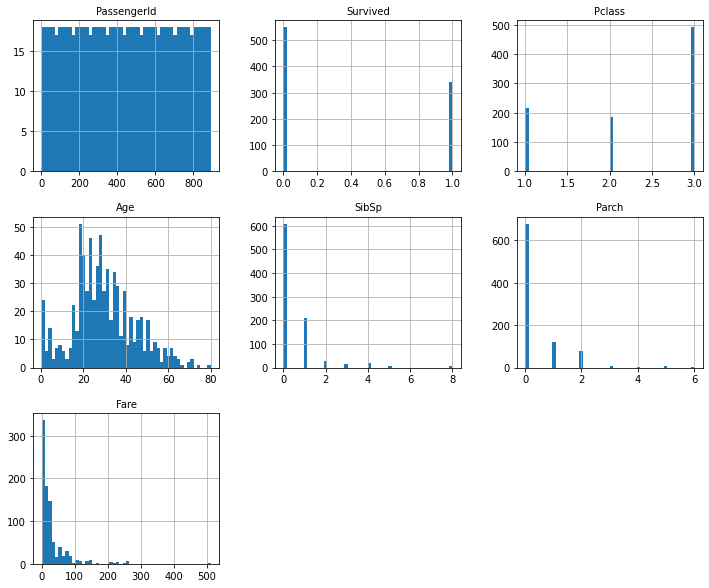

In [41]:
plt.rc('font', size = 10)
plt.rc('legend', fontsize = 10)
plt.rc('axes', labelsize = 10, titlesize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('xtick', labelsize = 10)
train_data.hist(bins = 50, figsize = (12, 10))
plt.show()

In [42]:
train, test = total_data[total_data["ind"].eq("train")], total_data[total_data["ind"].eq("test")]

In [43]:
train.drop(columns=["ind"], inplace = True, axis = 1)
test.drop(columns=["ind"], inplace = True, axis = 1)

C:\Users\Elearning Institute\AppData\Local\Temp\ipykernel_3312\537807756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=["ind"], inplace = True, axis = 1)
C:\Users\Elearning Institute\AppData\Local\Temp\ipykernel_3312\537807756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=["ind"], inplace = True, axis = 1)


In [44]:
features = train.drop("Survived", axis = 1)
label = train["Survived"]

In [45]:
features_test = test.drop("Survived", axis = 1)
label_test = test["Survived"]

In [46]:
numerical = ["Pclass", "SibSp", "Age", "Fare", "Parch", "num_of_relatives", "not_alone"]
categorical = ["Sex", "Embarked"]

In [47]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown = "ignore")
)

In [48]:
right_skew = make_pipeline(
    SimpleImputer(strategy= "median"),
    PowerTransformer(method= "yeo-johnson"),
    StandardScaler()
)

p_class = make_pipeline(
    OneHotEncoder(handle_unknown= "ignore"),
)

others = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

In [49]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,num_of_relatives,not_alone
0,3,male,3.0,1,0,2.0,S,1,1
1,1,female,5.0,1,0,5.0,C,1,1
2,3,female,3.0,0,0,2.0,S,0,0
3,1,female,4.0,1,0,5.0,S,1,1
4,3,male,4.0,0,0,2.0,S,0,0


In [50]:
num_pipeline = ColumnTransformer([
    ("rest", others, ["SibSp", "Parch", "num_of_relatives", "not_alone"]),
    ("pclass", p_class, ["Pclass"]),
    ("skew", right_skew, ["Age", "Fare"])
])

cat_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, categorical)
])

In [51]:
full_processing = ColumnTransformer([
    ('num', num_pipeline, numerical),
    ('cat', cat_pipeline, categorical)
])


preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include= object))
)

In [52]:
preprocessed_titanic = preprocessing.fit_transform(features)
preprocessed_titanic.shape

(891, 14)

Measuring Accuracy using Cross-Validation

Using RandomForestClassifier

In [53]:
random = Pipeline([
    ('preprocessing', preprocessing),
    ('rand', RandomForestClassifier(n_estimators= 100, random_state = 42))
])
random.fit(features, label)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('columntransformer-1',
                                                  ColumnTransformer(transformers=[('rest',
                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                    SimpleImputer(strategy='median')),
                                                                                                   ('standardscaler',
                                                                                                    StandardScaler())]),
                                                                                   ['SibSp',
                                                                                    'Parch',
                                                                                    'num_of_relatives',
                                                                                    'not_alone']),
                                                                                  ('pclass',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(handle_unk...
                                                 ('columntransformer-2',
                                                  ColumnTransformer(transformers=[('cat',
                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('onehotencoder',
                                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                                   ['Sex',
                                                                                    'Embarked'])]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021FFC0F3CA0>)])),
                ('rand', RandomForestClassifier(random_state=42))])

let's use the trained model to make predictions on the test set

In [ ]:
test_transformed = preprocessing.transform(features_test)
predict_label = random.predict(test_transformed)

In [54]:
test_transformed = preprocessing.transform(features_test)
predict_label = random.predict(test_transformed)

ValueError: X has 14 features, but ColumnTransformer is expecting 9 features as input.